In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
accuracy_score,
confusion_matrix,
precision_score,
recall_score,
classification_report
)
import matplotlib.pyplot as plt
from sklearn import metrics

# Exercise 1 : Understanding the problem and Data Collection
We want to predict if an individual will have diabetes.

- Load the diabetes dataset and explore it.
- How many positive and negative cases is there ?
- Split the data into training and testing sets

In [76]:
# import the dataset
diab = pd.read_csv('diabetes_prediction_dataset.csv')

In [58]:
diab.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [59]:
diab.shape

(100000, 9)

In [60]:
diab.isna().sum()
# no missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [61]:
diab = diab.dropna()

In [62]:
diab['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [77]:
# make labels to smoking categories
mapping = {
    'No Info' : 0,
    'never' : 1,
    'former' : 2,
    'current' : 3,
    'not current' : 4,
    'ever' : 5
}

diab['smoking_history'] = diab['smoking_history'].map(mapping)

In [113]:
diabetes = {0:'Not diabetes', 1:'Diabetes'}
print(diab['diabetes'].value_counts().rename(index = diabetes))

diabetes
Not diabetes    91500
Diabetes         8500
Name: count, dtype: int64


---
There are 8500 positive and 91500 negative cases
***

In [94]:
# define wanted columns
feature_columns = ['age', 'hypertension', 'heart_disease',	'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
x = diab[feature_columns]

target_column = ['diabetes']
y = diab[target_column]

In [95]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
) 

In [96]:
# Standartizise
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [97]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

prediction_scaled = model.predict(x_test_scaled)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
y_test_flat = y_test.values.flatten()
(prediction_scaled == y_test_flat).sum()

np.int64(19210)

In [99]:
for feature, weight in zip (x.columns, model.coef_[0]):
    print(f'{feature} : {weight}')

age : 1.027034800835619
hypertension : 0.21331032764969085
heart_disease : 0.1532681429911854
smoking_history : 0.17302155645532336
bmi : 0.5990306720629476
HbA1c_level : 2.499427550538224
blood_glucose_level : 1.3647229416673254


In [100]:
matrix = confusion_matrix(y_test, prediction_scaled)

true_negative = matrix[0,0]
true_positive = matrix[1,1]

false_negative = matrix[1,0]
false_positive = matrix[0,1]

print (f'true negative : {true_negative}')
print (f'true positive : {true_positive}')
print (f'false negative : {false_negative}')
print (f'false positive : {false_positive}')

true negative : 18126
true positive : 1084
false negative : 616
false positive : 174


# Exercise 2 : Model Picking and Standardization

### Which classification model can we use and why?

A suitable classification model for this problem is **Logistic Regression**.
It is appropriate because:
- the target variable (diabetes) is binary (0/1);
- the model is simple, interpretable, and works well as a baseline;
- it outputs probabilities, which is useful for medical decision-making;
- it performs well when features are numerical, as in this dataset.

Other models could also be used (e.g., Random Forest, SVM, KNN), but Logistic Regression is a strong first choice for binary classification.

### Do we need to standardize the data?

**Yes**, we need to standardize the data.
Many machine learning models—including Logistic Regression are sensitive to different feature scales. Features like BMI, glucose level, and age are measured in different units, so scaling helps:
- improve model convergence,
- make training more stable,
- give more meaningful coefficient values.

That's why we use StandardScaler().

In [102]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Exercise 3 : Model Training

In [ ]:
model = LogisticRegression(max_iter=1000) # create the model
model.fit(x_train_scaled, y_train) # train the model

prediction_scaled = model.predict(x_test_scaled) # predict on test sample

# Exercise 4 : Evaluation Metrics
- Plot the accuracy score and comment the results.
- Plot the confusion matrix and comment the results.
- Plot the Recall, precision, F1-score and comment the results.

In [104]:
# Accuracy score
accuracy_score(y_test, prediction_scaled)

0.9605

---
**Accuracy score interpretation**<br>
96.05% of the samples in the test dataset (y_test) were classified correctly by the model.
***

In [105]:
# Confusion matrix
matrix = confusion_matrix(y_test, prediction_scaled)

true_negative = matrix[0,0]
true_positive = matrix[1,1]

false_negative = matrix[1,0]
false_positive = matrix[0,1]

print (f'true negative : {true_negative}')
print (f'true positive : {true_positive}')
print (f'false negative : {false_negative}')
print (f'false positive : {false_positive}')

true negative : 18126
true positive : 1084
false negative : 616
false positive : 174


---
**Confision matrix interpretation**
The following results from the Confusion Matrix summarize the model's predictive performance on the test data:

1. Correct Predictions (True Results)
- True Positives (TP) and True Negatives (TN) represent the instances where the model's prediction matched the actual condition.
    - True Positives (TP): 1,084 -> The model correctly identified 1,084 patients as having diabetes. (Correctly predicted the presence of the condition.)
    - True Negatives (TN): 18,126 -> The model correctly identified 18,126 patients as not having diabetes. (Correctly predicted the absence of the condition.)

2. Classification Errors (False Results)
- False Negatives (FN) and False Positives (FP) represent the two types of mistakes the model made.

    - False Negatives (FN): 616 -> This is a Type II Error (or a "miss"). The model failed to detect the condition, incorrectly predicting 'No Diabetes' for 616 patients who actually had diabetes. (This is often considered the more critical mistake in medical diagnosis).

    - False Positives (FP): 174 -> This is a Type I Error (or a "false alarm"). The model incorrectly predicted 'Diabetes' for 174 patients who were actually healthy.


True Positives and True Negatives are the correctly classified outcomes. 1,084 patients with diabetes were correctly identified, and 18,126 healthy patients were correctly identified. False Negatives and False Positives represent the two types of prediction errors.
***

# Exercise 5 : Visualizing the performance of our model
- Visualize the decision boundary with accuracy information.

In [135]:
X_2D = diab[['bmi', 'blood_glucose_level']]
y_2D = diab['diabetes']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(
    X_2D, y_2D, test_size=0.2, random_state=42, stratify=y_2D
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [137]:
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [146]:
def plot_decision_boundary_with_accuracy(model, X, y, scaler=None):
    # Scale real data
    X_scaled = scaler.transform(X) if scaler else X

    # Predictions on real data
    preds = model.predict(X_scaled)
    accuracy = accuracy_score(y, preds)
    misclassified = (preds != y.values).astype(bool)

    # Create grid
    x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
    y_min, y_max = X.iloc[:,1].min() - 1, X.iloc[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    # Scale grid
    if scaler:
        grid_scaled = scaler.transform(grid)
    else:
        grid_scaled = grid

    # Predict on grid
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    # Plot boundary
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot correct points
    plt.scatter(
        X.iloc[~misclassified, 0],
        X.iloc[~misclassified, 1],
        c='green',
        label='Correct',
        edgecolors='black'
    )

    # Plot misclassified
    plt.scatter(
        X.iloc[misclassified, 0],
        X.iloc[misclassified, 1],
        c='red',
        label='Misclassified',
        marker='x',
        s=80
    )

    plt.title(f"Decision Boundary | Accuracy: {accuracy:.3f}")
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.show()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


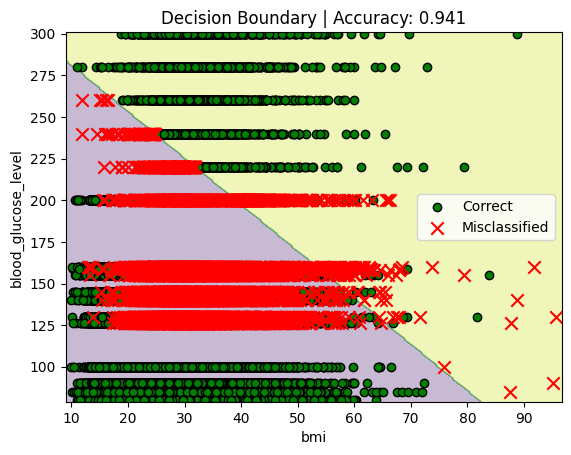

In [147]:
plot_decision_boundary_with_accuracy(model, X_2D, y_2D, scaler)

# Exercise 6 : ROC Curve

In [150]:
#define the predictor variables and the response variable
feature_columns = ['age', 'hypertension', 'heart_disease',	'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = diab[feature_columns]

target_column = ['diabetes']
y = diab[target_column]

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


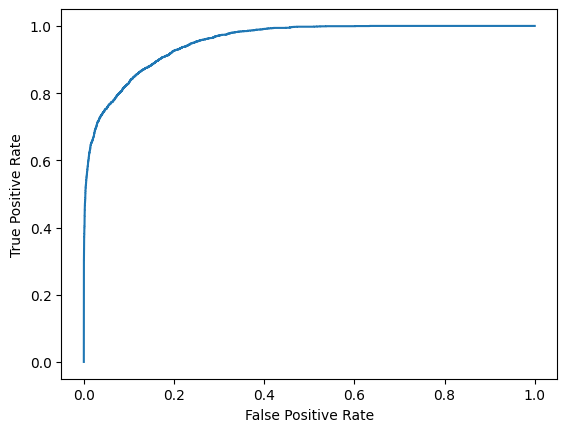

In [151]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

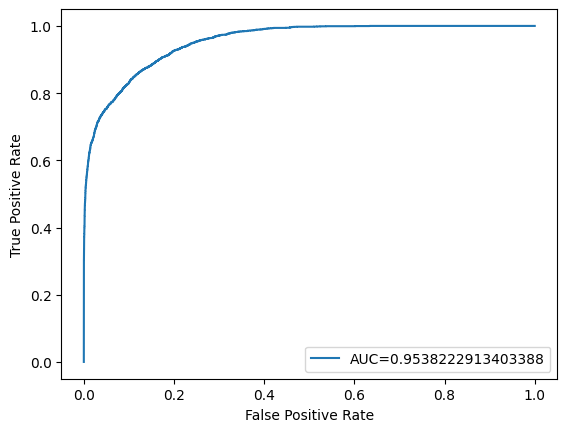

In [152]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

---
- Conclusion: 0.9538 means that if we randomly selected one patient (positive) and one healthy (negative) from the test set, the model would be 95.38% more likely to correctly classify the patient as healthier than the healthy person.

- Therefore: The model performs very well in classifying and distinguishing between the "Diabetes" and "No Diabetes" categories. A curve approaching the upper left (TPR=1, FPR=0) indicates a near-perfect classification.
***